In [1]:
from nodes.nodes import FoldiakNode, InputNode
from nodes.net import FoldiakShapedNet
from nodes.layer import ShapedLayer

import random
import matplotlib.pyplot as plt

random.seed(42)

inputlayer = ShapedLayer((8,8))
foldiaklayer = ShapedLayer(16)

foldiaklayer.fillnodes(FoldiakNode)
inputlayer.fillnodes(InputNode)
    
network = FoldiakShapedNet()
network.append(inputlayer)
network.append(foldiaklayer)
network.connect_foldiak(inputlayer, foldiaklayer)

network.setparam("intmethod","BDF")

network.setparam("a",0.01)
network.setparam("b",0.001)
network.setparam("y",0.01)
network.setparam("p",1.0/8)
network.setparam("l",10)
network.setparam("dt",0.05)
network.setparam("tnum",100)

In [2]:
#network.setparam("intmethod","BDF")
network.setup()
for i in inputlayer.nodes:
    i.setvalstored(random.uniform(0,1))

network.update()
network.update()

import time
deltas = []

for i in range(200):
    t0 = time.clock()
    network.update()
    t1 = time.clock()
    deltas.append(t1-t0)
print(sum(deltas)/len(deltas))

0.019664124000000005


In [3]:
import numpy as np
samples = np.loadtxt("../data/lines.csv")

network.setup()

In [4]:
#Steady state thres:
network.setparam("a",0.0)
network.setparam("b",0.0)
network.setparam("y",0.5)
for i in range(200):
    for i in inputlayer.nodes:
        i.setvalstored(random.uniform(0,1))
    network.update()

In [5]:
network.setparam("a",0.01)
network.setparam("b",0.001)
network.setparam("y",0.01)

outnum = 5000
innum = 5
count = 0

for i in range(outnum):
    for j in range(len(inputlayer.nodes)):
        inputlayer.nodes[j].setvalstored(samples[i,j])
    for j in range(innum):
        network.update()
    count += innum
    if ((count%1000)==0):
        print(str(count)+"/"+str(innum*outnum))

1000/25000
2000/25000
3000/25000
4000/25000
5000/25000
6000/25000
7000/25000
8000/25000
9000/25000
10000/25000
11000/25000
12000/25000
13000/25000
14000/25000
15000/25000
16000/25000
17000/25000
18000/25000
19000/25000
20000/25000
21000/25000
22000/25000
23000/25000
24000/25000
25000/25000


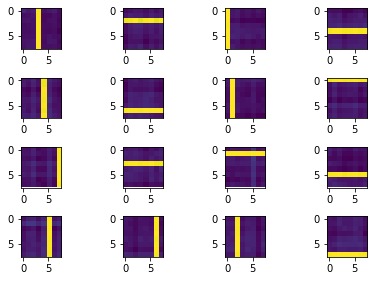

In [6]:
fig=plt.figure()

for node_num in range(len(foldiaklayer.nodes)):
    testbias = []
    connects = np.reshape(network.cgroups[0].npconnects, -1)
    for node in inputlayer.nodes:
        for i in connects:
            if (i.input is node) and (i.output is foldiaklayer.nodes[node_num]):
                testbias.append(i.bias)
    fig.add_subplot(4,4,node_num+1)
            
    plt.imshow(np.array(testbias).reshape((8,8)))
fig.tight_layout()
plt.savefig("2020_07_07_bias_figure.png")
plt.show()

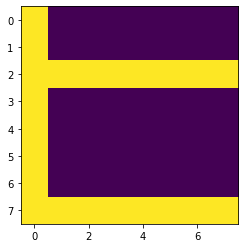

[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [7]:
samplenum = 30
plt.imshow(samples[samplenum,:].reshape((8,8)))
plt.savefig("2020_07_07_sample_ex.png")
plt.show()
for i in range(8*8):
    inputlayer.nodes[i].setvalstored(samples[samplenum,i])
network.update()
output = []
for i in foldiaklayer.nodes:
    output.append(i.returnval())
output

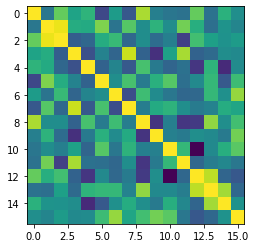

In [8]:
plt.imshow(network.cgroups[1].getbiases())
plt.savefig("2020_07_07_inhibition_ex.png")
plt.show()